In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [4]:
female_births = pd.read_csv('Series/daily-total-female-births-in-cal.csv')
mean_monthly_temp = pd.read_csv('Series/mean-monthly-air-temperature-deg.csv')
robberies_in_boston = pd.read_csv('Series/monthly-boston-armed-robberies-j.csv')
sales_of_company_x = pd.read_csv('Series/monthly-sales-of-company-x-jan-6.csv')
dowjones_closing = pd.read_csv('Series/weekly-closings-of-the-dowjones-.csv')

Проанализируем временные ряды на стационарность и сделаем их стационарными, если они таковыми не являются.

---

In [5]:
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [6]:
series1 = female_births['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


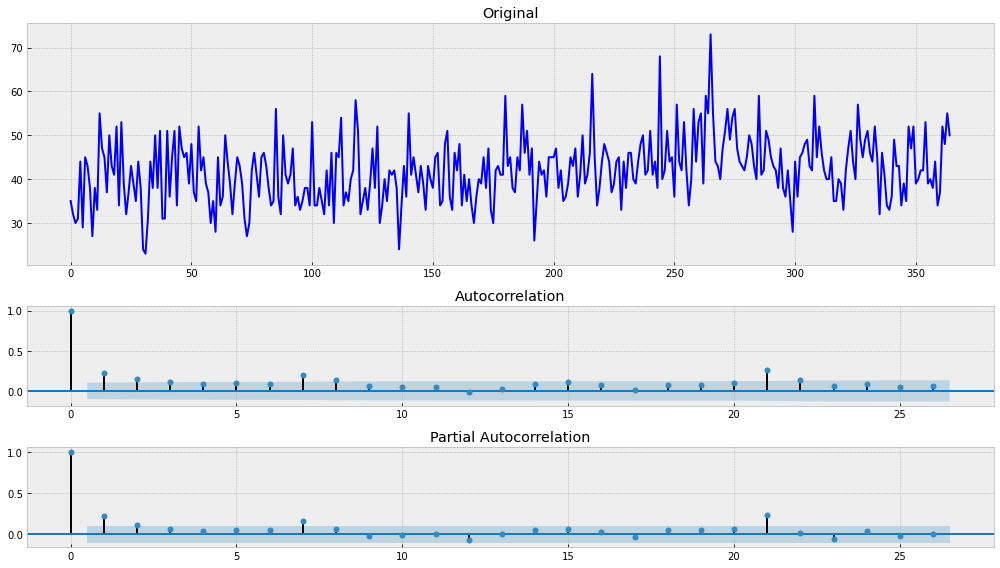

In [7]:
tsplot(series1)

Тест Дики-Фуллера и графики отвергают гипотезу о нестационарности этого ряда. Следовательно мы можем считать этот ряд стационарным.

---

In [8]:
mean_monthly_temp

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1
...,...,...
235,1939-08,61.8
236,1939-09,58.2
237,1939-10,46.7
238,1939-11,46.6


In [9]:
series2 = mean_monthly_temp['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


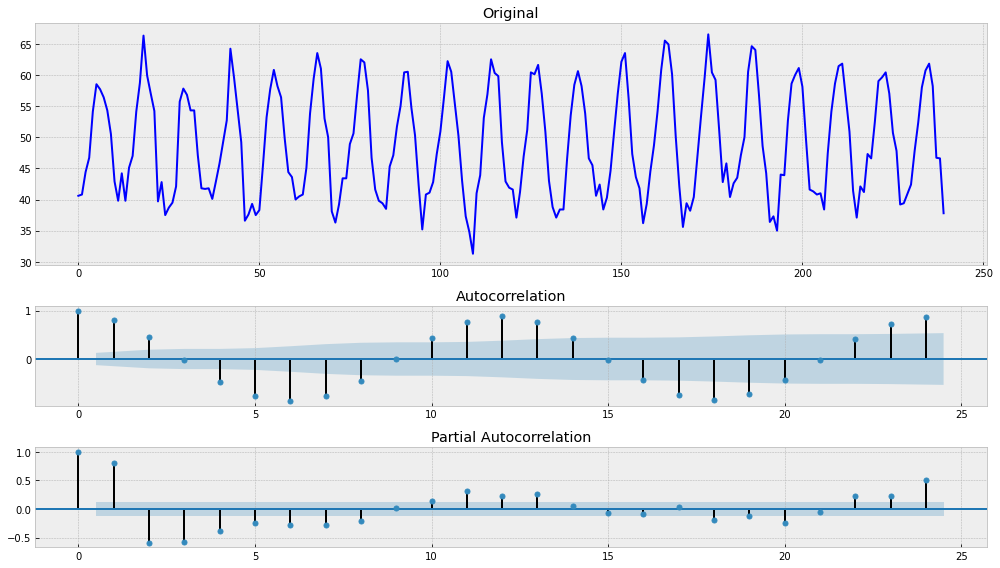

In [10]:
tsplot(series2)

Тест Дики-Фуллера не отвергает гипотезу о том, что ряд нестационарен. По графикам можно заметить влияние сезонности.
Уберём сезонность и посмотрим на тест и графики.

In [11]:
series2 = series2[12:].values - series2[:-12].values

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


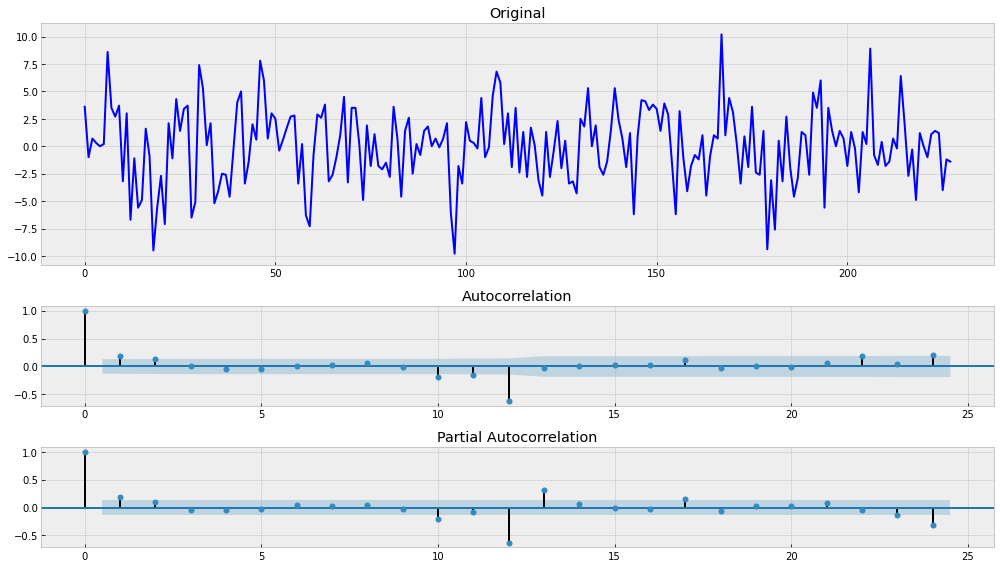

In [12]:
tsplot(series2)

Тест отвергает гипотезу о нестационарности. По графикам также нельзя сказать, что ряд нестационарный.

---

In [13]:
robberies_in_boston

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43
...,...,...
113,1975-06,316
114,1975-07,398
115,1975-08,394
116,1975-09,431


In [14]:
series3 = robberies_in_boston['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


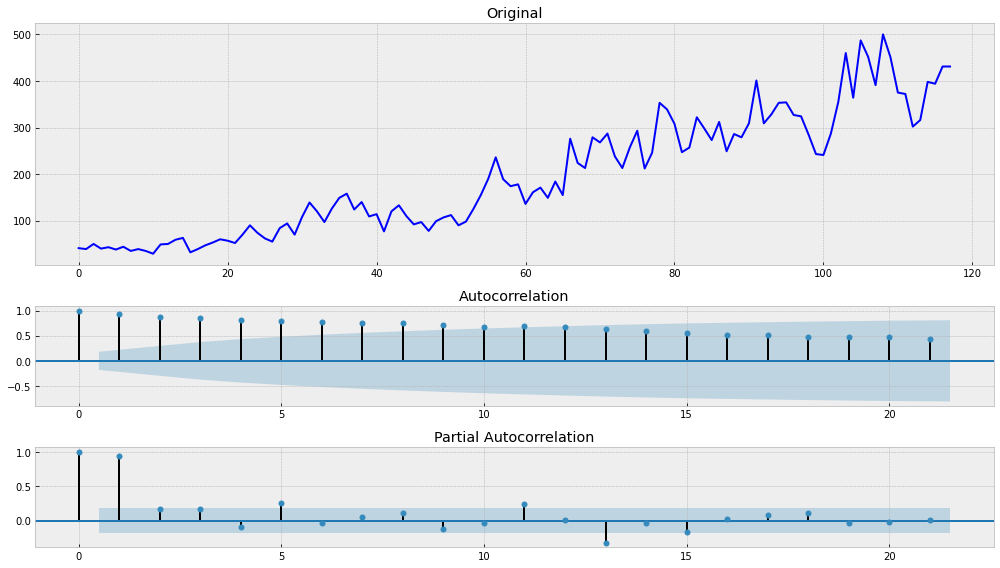

In [15]:
tsplot(series3)

Тест не отвергает гипотезу о нестационарности этого ряда. По графику видно наличие тренда и изменение дисперсии. Уберём изменение дисперсии при помощи преобразования Бокса-Кокса и тренд при помощи дифференцирования первого порядка, т.к. изменение тренда близко к линейному. После каждого преобразования сравним тест и графики.

In [16]:
# Применим преобразование Бокса-Кокса
series3 = boxcox(series3, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


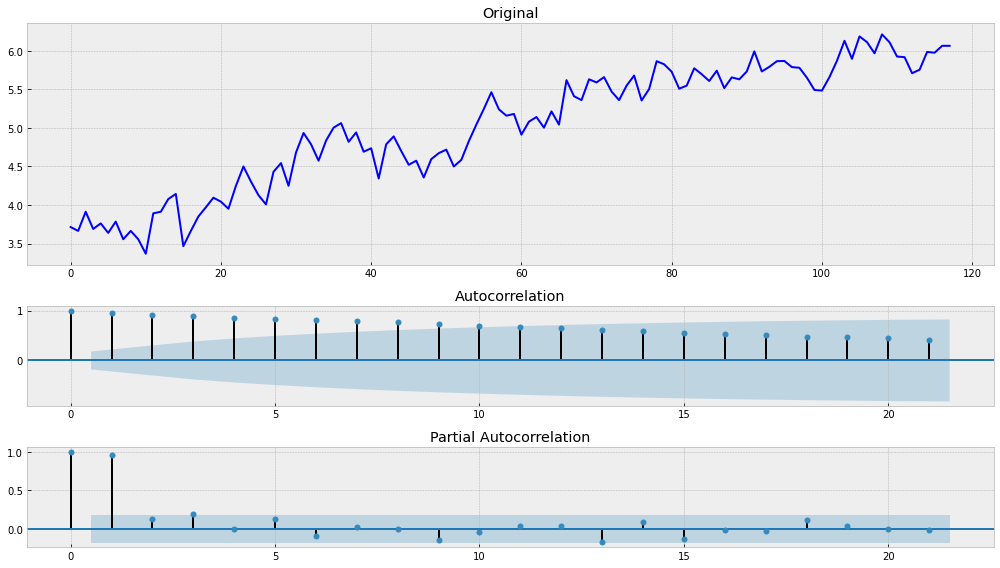

In [17]:
tsplot(series3)

In [18]:
# Разность первого порядка
series3 = series3[1:] - series3[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


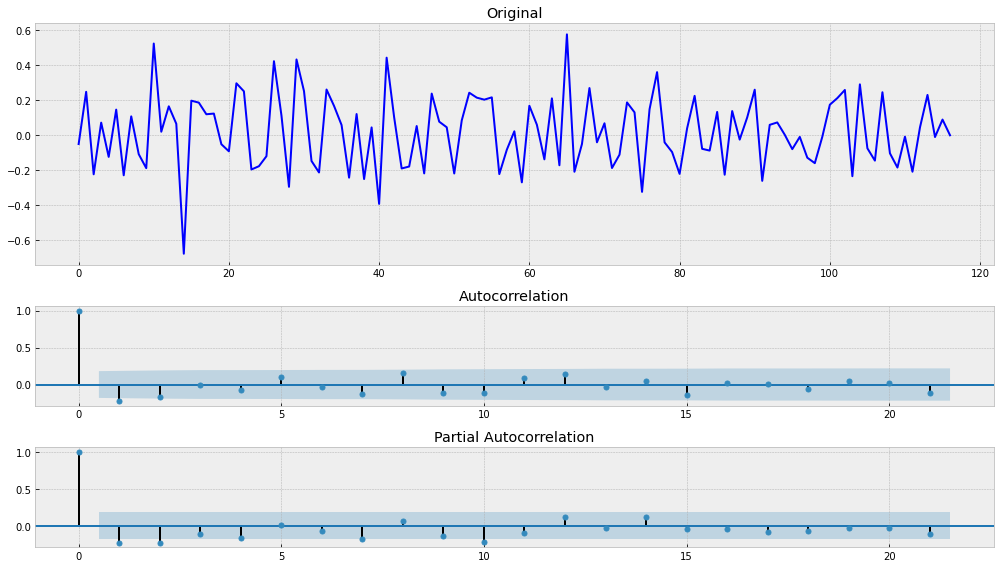

In [19]:
tsplot(series3)

После двух преобразований мы можем отвергнуть гипотезу о нестационарности ряда с помощью теста Дики-Фуллера и убедиться по графикам.

---

In [20]:
sales_of_company_x

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36
...,...,...
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248


In [21]:
series4 = sales_of_company_x['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


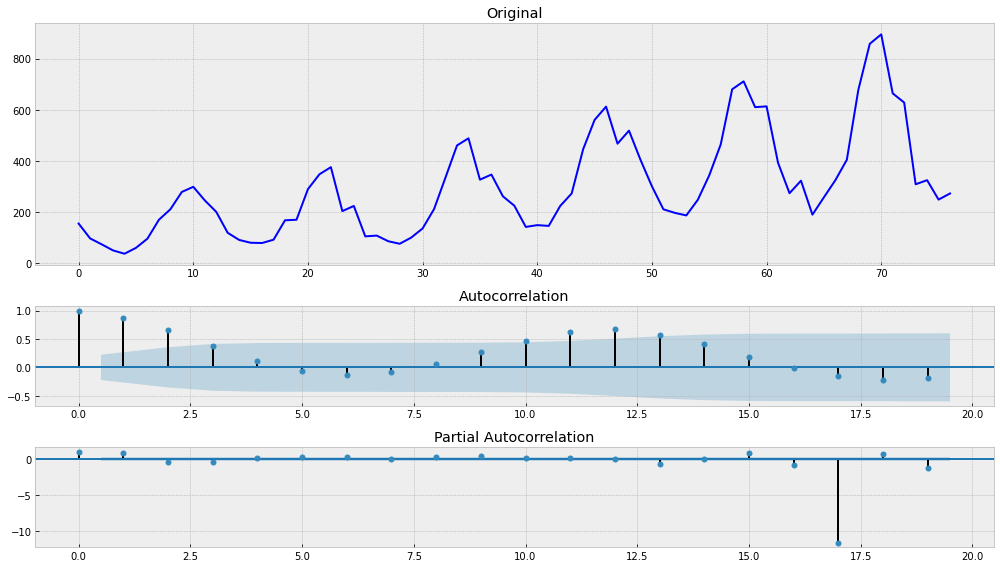

In [22]:
tsplot(series4)

Из теста и графиков видно, что этот ряд также нестационарный. Мы видим наличие размаха дисперсии, тренда, а также сезонности. Применим преобразования для их устранения. Сезонность уберём с помощью дифференцирования.

In [23]:
# Уберем изменение дисперсии
series4 = boxcox(series4, 0)

# Уберём влияние тренда
series4 = series4[1:] - series4[:-1]

# Уберём влияние сезонности, при этом последние 5 месяцев учитывать не будем, т.к. они не составляют сезон
series4 = series4[12:-5] - series4[:-17]

Results of Dickey-Fuller Test:
Test Statistic                -1.421135e+01
p-value                        1.719334e-26
#Lags Used                     0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


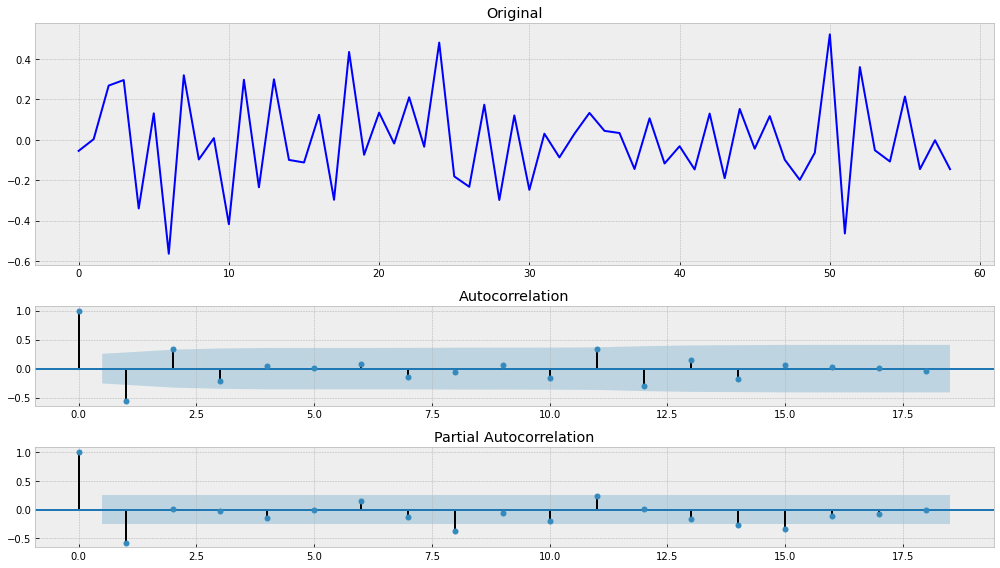

In [24]:
tsplot(series4)

После всех преобразований мы отвергаем гипотезу о нестационарности ряда.

---

In [25]:
dowjones_closing[6:]

,Week,Close
6,1971-W33,856.02
7,1971-W34,880.91
8,1971-W35,908.15
9,1971-W36,912.75
10,1971-W37,911.00
...,...,...
157,1974-W28,791.77
158,1974-W29,787.23
159,1974-W30,787.94
160,1974-W31,784.57


In [26]:
series5 = dowjones_closing['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


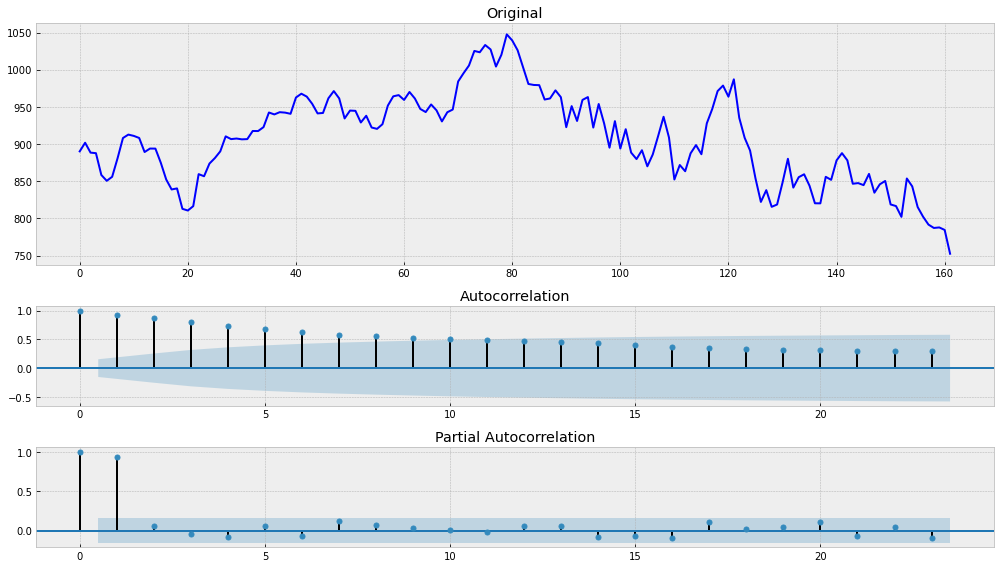

In [27]:
tsplot(series5)

Последний ряд также является не стационарным. Из графика видно наличие тренда в виде квадратической параболы. Продифференцируем ряд по формуле разности второго порядка.  

Разность первого порядка:
$$\begin{equation}
y'_t = \Delta{y_t} = y_t - y_{t-1}
\end{equation}$$  
Разность второго порядка:
$$\begin{equation}
y''_t = \Delta{y'_t} = y'_t - y'_{t-1} = y_t - y_{t-1} - y_{t-1} + y_{t-2} = y_t - 2y_{t-1} + y_{t-2}
\end{equation}$$

In [28]:
series5 = series5.values[2:] - 2 * series5.values[1:-1] + series5.values[:-2]

Results of Dickey-Fuller Test:
Test Statistic                  -5.043437
p-value                          0.000018
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


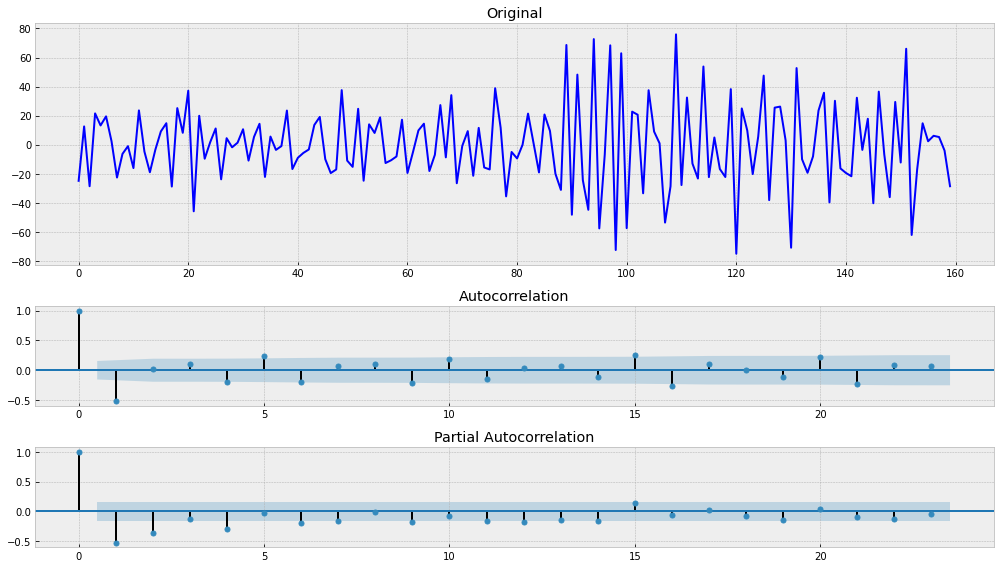

In [29]:
tsplot(series5)

После дифференцирования мы можем отвергнуть гипотезу о нестационарности ряда.  
  
Попробуем определить сезонность и убрать её.

In [30]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

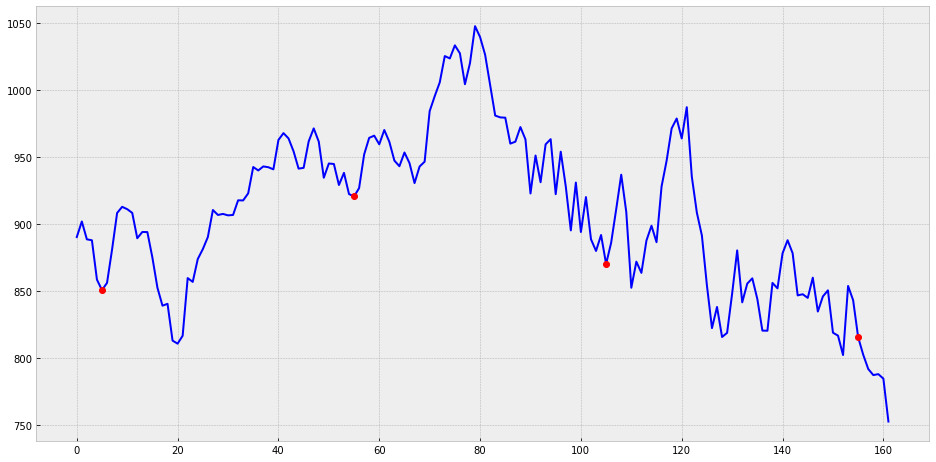

In [31]:
plot_ts_and_points(dowjones_closing['Close'], 5, 50)

In [32]:
series5 = series5[5:155][50:] - series5[5:155][:-50]

Results of Dickey-Fuller Test:
Test Statistic                 -5.420991
p-value                         0.000003
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


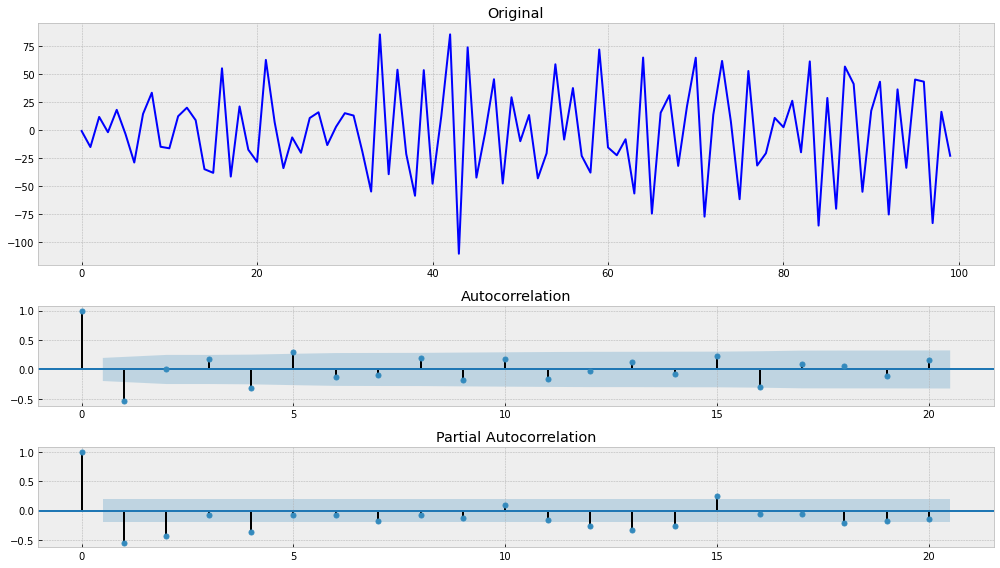

In [33]:
tsplot(series5)